In [1]:
# https://www.kaggle.com/dansbecker/partial-dependence-plots/notebook

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['titanic', 'melbourne-housing-snapshot']


In [5]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

In [6]:
melb_data = pd.read_csv("../input/melbourne-housing-snapshot/melb_data.csv")
melb_data.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [9]:
cols_to_use = ['Distance', 'Landsize', 'BuildingArea']

X = melb_data[cols_to_use]
y = melb_data.Price

my_imupter = Imputer()
X_imputed = my_imupter.fit_transform(X)

(<matplotlib.figure.Figure at 0x7fbdd6ca3ac8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fbdd6ca3b38>])

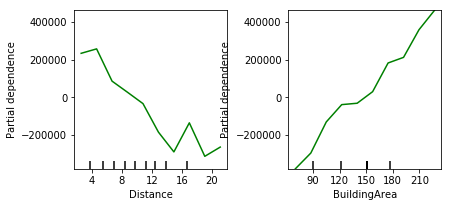

In [12]:
model = GradientBoostingRegressor()
model.fit(X_imputed, y)

plot_partial_dependence(model, X_imputed, features=['Distance','BuildingArea'], feature_names=cols_to_use, grid_resolution=10)

In [14]:
titanic_data = pd.read_csv("../input/titanic/train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

(<matplotlib.figure.Figure at 0x7fbdd67bb940>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fbdd69774a8>])

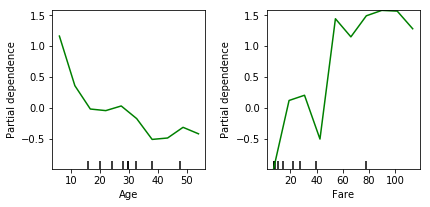

In [19]:
titanic_X_colns = ['PassengerId','Age', 'Fare']

X = titanic_data[titanic_X_colns]
y = titanic_data.Survived

my_imputer = Imputer()
X_imputed = my_imputer.fit_transform(X)

model = GradientBoostingClassifier()
model.fit(X_imputed, y)

plot_partial_dependence(model, X_imputed, features = [1, 2], feature_names=titanic_X_colns, grid_resolution=10)